#### Subject Recognition

This program is primarily concerned with querying the subject programs and writing the results to a text file.


In [1]:
import requests
# If you are using a Jupyter notebook, uncomment the following line.
from google.cloud import vision
#%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw,ImageColor,ExifTags
from io import BytesIO
import sys

secretText = 'SECRETS.txt'

fSecret = open(secretText, "r")

while True:
    
    line = fSecret.readline()
    
    if not line:
        break
    
    words = line[:-1]
        
    if words.startswith('GCP_JSON'):
        
        start = words.find('[') + 1
        
        end = words.find(']')
        
        intWords = words[start:end]
        
        gcpJSON = intWords

In [2]:
import requests
# If you are using a Jupyter notebook, uncomment the following line.
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials
#%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw,ImageColor,ExifTags
from io import BytesIO
import sys

secretText = 'SECRETS.txt'

fSecret = open(secretText, "r")

while True:
    
    line = fSecret.readline()
    
    if not line:
        break
    
    words = line[:-1]
        
    if words.startswith('MS_Key'):
        
        start = words.find('[') + 1
        
        end = words.find(']')
        
        intWords = words[start:end]
        
        msKey = intWords

{'rectangle': {'x': 433, 'y': 420, 'w': 139, 'h': 155}, 'object': 'car', 'confidence': 0.611, 'parent': {'object': 'Land vehicle', 'confidence': 0.643, 'parent': {'object': 'Vehicle', 'confidence': 0.644}}}
{'rectangle': {'x': 565, 'y': 429, 'w': 104, 'h': 117}, 'object': 'car', 'confidence': 0.589, 'parent': {'object': 'Land vehicle', 'confidence': 0.616, 'parent': {'object': 'Vehicle', 'confidence': 0.616}}}
{'rectangle': {'x': 702, 'y': 414, 'w': 156, 'h': 139}, 'object': 'car', 'confidence': 0.596, 'parent': {'object': 'Land vehicle', 'confidence': 0.667, 'parent': {'object': 'Vehicle', 'confidence': 0.667}}}
{'rectangle': {'x': 1285, 'y': 403, 'w': 118, 'h': 152}, 'object': 'car', 'confidence': 0.514, 'parent': {'object': 'Land vehicle', 'confidence': 0.537, 'parent': {'object': 'Vehicle', 'confidence': 0.537}}}
{'rectangle': {'x': 7, 'y': 393, 'w': 90, 'h': 296}, 'object': 'car', 'confidence': 0.647, 'parent': {'object': 'Land vehicle', 'confidence': 0.703, 'parent': {'object': '

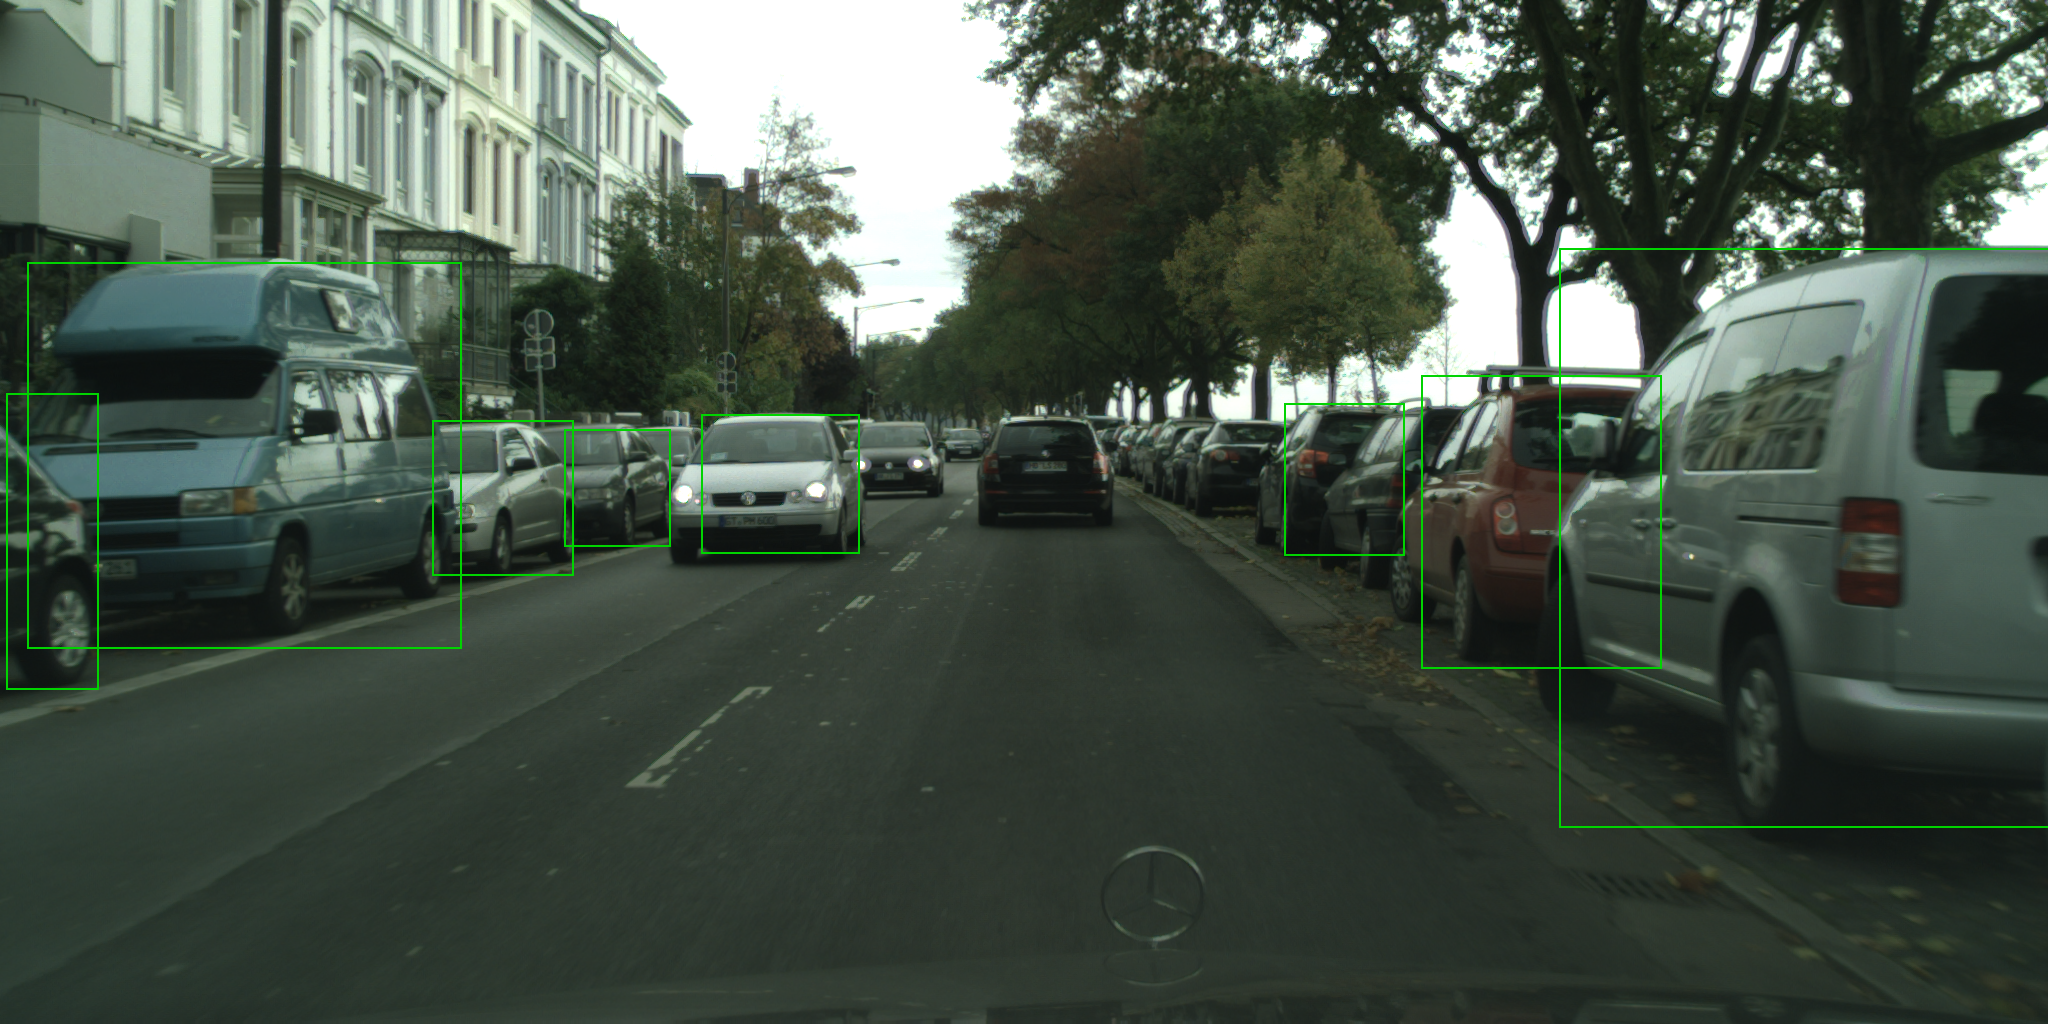

car
car
car
car
car
Van
car
car


In [3]:
subscription_key = "Key-Here"
assert subscription_key

# You must use the same region in your REST call as you used to get your
# subscription keys. For example, if you got your subscription keys from
# westus, replace "westcentralus" in the URI below with "westus".
#
# Free trial subscription keys are generated in the "westus" region.
# If you use a free trial subscription key, you shouldn't need to change
# this region.
# vision_base_url = "https://westcentralus.api.cognitive.microsoft.com/vision/v2.0/"
vision_base_url = "https://eastus2.api.cognitive.microsoft.com/vision/v2.0/"

analyze_url = vision_base_url + "analyze"

# Set image_path to the local path of an image that you want to analyze.
# image_path = "/Users/XXX/work/project/testing-object-detector/data/kite.png"
image_path = "./bremen.png"

# Read the image into a byte array
image_data = open(image_path, "rb").read()
headers    = {'Ocp-Apim-Subscription-Key': subscription_key,
              'Content-Type': 'application/octet-stream'}
params     = {'visualFeatures': 'Objects'}
response = requests.post(
    analyze_url, headers=headers, params=params, data=image_data)
response.raise_for_status()

# The 'analysis' object contains various fields that describe the image. The most
# relevant caption for the image is obtained from the 'description' property.
analysis = response.json()
# print(analysis)
# image_caption = analysis["description"]["captions"][0]["text"].capitalize()

# Display the image and overlay it with the caption.

image = Image.open(open(image_path, "rb"))
imgWidth, imgHeight = image.size
draw = ImageDraw.Draw(image)

# calculate and display bounding boxes for each detected face
for label in analysis['objects']:
    # print (label)
    print (label)
    box = label['rectangle']
    left = box['x']
    top = box['y']
    width = box['w']
    height = box['h']

    points = (
        (left,top),
        (left + width, top),
        (left + width, top + height),
        (left , top + height),
        (left, top)
    )
    #print (label['object'], points)
    #if label['object'] == "Person":
    draw.line(points, fill='#00d400', width=2)

    # Alternatively can draw rectangle. However you can't set line width.
    #draw.rectangle([left,top, left + width, top + height], outline='#00d400')

image.show()

for label in analysis['objects']:
    
    objectMS = label['object']
    print(objectMS)

In [56]:
import json

'''
with open('MSCOCO_GCP.txt', 'r') as file:
    
    COCO_orgGCPList = []
    
    ind = 1
    
    for line in file:
        
        if ind==-1:
            
            curDict = json.loads(line)
            COCO_orgGCPList.append(curDict)
            
        ind = ind*-1

with open('MSCOCO_MS.txt', 'r') as file:
    
    COCO_orgMSList = []
    
    ind = 1
    
    for line in file:
        
        if ind==-1:
            
            curDict = json.loads(line)
            COCO_orgMSList.append(curDict)
            
        ind = ind*-1
        
with open('MSCOCO_AWS.txt', 'r') as file:
    
    COCO_orgAWSList = []
    
    ind = 1
    
    for line in file:
        
        if ind==-1:
            
            curDict = json.loads(line)
            COCO_orgAWSList.append(curDict)
            
        ind = ind*-1
'''


with open('Streets_GCP.txt', 'r') as file:
    
    Streets_orgGCPList = []
    
    ind = 1
    
    for line in file:
        
        if ind==-1:
            
            curDict = json.loads(line)
            Streets_orgGCPList.append(curDict)
            
        ind = ind*-1

with open('Streets_MS.txt', 'r') as file:
    
    Streets_orgMSList = []
    
    ind = 1
    
    for line in file:
        
        if ind==-1:
            
            curDict = json.loads(line)
            Streets_orgMSList.append(curDict)
            
        ind = ind*-1
        
with open('Streets_AWS.txt', 'r') as file:
    
    Streets_orgAWSList = []
    
    ind = 1
    
    for line in file:
        
        if ind==-1:
            
            curDict = json.loads(line)
            Streets_orgAWSList.append(curDict)
            
        ind = ind*-1


print("Hello")

Hello


In [57]:
'''
print(len(COCO_orgGCPList))
print(len(COCO_orgMSList))
print(len(COCO_orgAWSList))
'''

print(len(Streets_orgGCPList))
print(len(Streets_orgMSList))
print(len(Streets_orgAWSList))


print("XXX")

315
315
315
XXX


In [58]:
import time
import math
import json
from collections import Counter
import os

import boto3
import io

classes = ['person', 'bicycle', 'car', 'motorcycle', 'bus', 'truck', 'stop sign', 'bird', 'cat', 'dog']

classesShrink = ['person', 'car', 'motorcycle', 'truck']


fileLoc = "Rotate/Iter5/Iter5BremenRotateFinal"

fileLocName = fileLoc + "/" + "Recog" + "GCP" + ".txt"

with open(fileLocName, 'w') as file:

    for objTypeNum in classesShrink:
        
        if objTypeNum=='person':
            
            pathNameInd = 1
        elif objTypeNum=='car':
            
            pathNameInd = 2
        elif objTypeNum=='motorcycle':
            
            pathNameInd = 3
        elif objTypeNum=='truck':
            
            pathNameInd = 4
            
        curNumMask = str(pathNameInd).zfill(3)

        file.write(objTypeNum + "\n")
        print("Class:")
        print(objTypeNum)

        #Total Number Expected
        totDict = {}
        #Total Number Missed
        type1Count = {}
        #Total Number Added
        type2Count = {}

        #315
        for i in range(315):

            curNum = str(i).zfill(6)

            
            strName = "bremen_" + curNum + "_000019_leftImg8bit"

            strNameAdd = strName + ".png"
            
            
            '''
            strName = "COCO" + str(i) 

            strNameAdd = strName + ".png"
            '''

            fullPathName = (fileLoc + "/" + strName + "_mask" + 
                            curNumMask + ".png")

            if os.path.exists(fullPathName):

                file.write(fullPathName + "\n")

                image_path = fullPathName

                client = vision.ImageAnnotatorClient().from_service_account_json(gcpJSON)

                '''
                image = Image.open(open(image_path,'rb'))
                row,col = image.size
                stream = io.BytesIO()
                image.save(stream, format=image.format)
                image_binary = stream.getvalue()

                client = boto3.client('rekognition', region_name='regionName', aws_access_key_id='Key-Here', 
                                      aws_secret_access_key='Key-Here')
                response = client.detect_labels(Image={'Bytes': image_binary})

                orgDictAWS = {}

                for label in response['Labels']:

                    for box in label['Instances']:                

                        curObj = label['Name']
                        key = curObj.lower()

                        if key in orgDictAWS:

                            orgDictAWS[key] = orgDictAWS[key] + 1
                        else:

                            orgDictAWS[key] = 1
                '''

                '''
                image_data = open(image_path, "rb").read()
                headers    = {'Ocp-Apim-Subscription-Key': subscription_key,
                              'Content-Type': 'application/octet-stream'}
                params     = {'visualFeatures': 'Objects'}
                response = requests.post(
                    analyze_url, headers=headers, params=params, data=image_data)
                response.raise_for_status()

                analysis = response.json()
                '''

                
                with open(image_path, 'rb') as image_file:
                    content = image_file.read()
                ig = vision.Image(content=content)

                objects = client.object_localization(
                    image=ig).localized_object_annotations

                newDictMS = {}

                for object_ in objects:

                    key = object_.name
                    key = key.lower()

                    if key in newDictMS:

                        newDictMS[key] = newDictMS[key] + 1
                    else:

                        newDictMS[key] = 1
                

                '''
                newDictMS = {}

                for label in analysis['objects']:

                    key = label['object']
                    key = key.lower()

                    if key in newDictMS:

                        newDictMS[key] = newDictMS[key] + 1
                    else:

                        newDictMS[key] = 1
                '''

                #newDictMS = orgDictAWS

                file.write(json.dumps(newDictMS))
                file.write("\n")

                orgDictMS = Streets_orgGCPList[i]

                '''
                if objTypeNum in orgDictMS:

                    orgDictMS[objTypeNum] = 0
                '''

                expDictMS = orgDictMS

                for key in expDictMS:

                    expCount = expDictMS[key]

                    if key in totDict:

                        totDict[key] = totDict[key] + expCount
                    else:

                        totDict[key] = expCount

                    if key in newDictMS:

                        newCount = newDictMS[key]
                    else:

                        newCount = 0

                    if newCount<expCount:

                        if key in type1Count:

                            type1Count[key] = type1Count[key] + expCount - newCount
                        else:

                            type1Count[key] = expCount - newCount

                for key in newDictMS:

                    newCount = newDictMS[key]

                    if key in expDictMS:

                        expCount = expDictMS[key]
                    else:

                        expCount = 0

                    if newCount>expCount:

                        if key in type2Count:

                            type2Count[key] = type2Count[key] + newCount - expCount
                        else:

                            type2Count[key] = newCount - expCount

        file.write("Total Count:" + "\n")
        file.write(json.dumps(totDict))
        file.write("\n")
        file.write("Type 1 Error Count (Missed):" + "\n")
        file.write(json.dumps(type1Count))
        file.write("\n")
        file.write("Type 2 Error Count (Added):" + "\n")
        file.write(json.dumps(type2Count))
        file.write("\n")

        '''
        print("Total Count:")
        print(totDict)
        print("Type 1 Error Count:")
        print(type1Count)
        print("Type 2 Error Count:")
        print(type2Count)
        '''
            
print("Done")

Class:
person
Class:
car
Class:
motorcycle
Class:
truck
Done
